<a href="https://colab.research.google.com/github/soyeunju/ESAA/blob/main/ESAA_0920_Week3_Fri_Session_chipotle_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [ ]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipo = pd.read_csv(url, sep = '\t')

### Step 4. See the first 10 entries

In [ ]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [49]:
import seaborn as sns
c=chipo.groupby(['item_name'])['quantity'].agg('sum').reset_index().sort_values(by='quantity',ascending=False).head()
c

,item_name,quantity
17,Chicken Bowl,761
18,Chicken Burrito,591
25,Chips and Guacamole,506
39,Steak Burrito,386
10,Canned Soft Drink,351


<ipython-input-58-a0902247bfd9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c['item_name'],y=c['quantity'],palette='Set3')


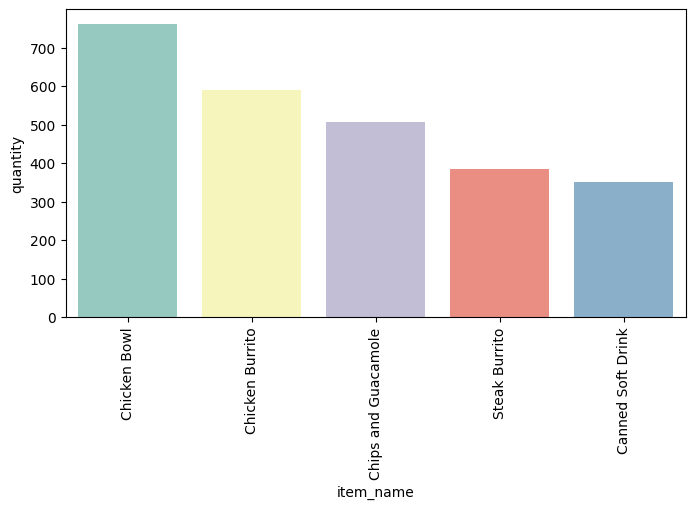

In [58]:
plt.figure(figsize=(8,4))
sns.barplot(x=c['item_name'],y=c['quantity'],palette='Set3')
plt.xticks(rotation='vertical')
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [32]:
chipo['item_price'] = chipo['item_price'].replace('[\$,]', '', regex=True).astype(float)

chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [33]:
id_price=chipo.groupby(by='order_id')['item_price'].sum().reset_index()
id_price.head()

,order_id,item_price
0,1,11.56
1,2,16.98
2,3,12.67
3,4,21.00
4,5,13.70


In [36]:
id_quant=chipo.groupby(by='order_id')['quantity'].sum().reset_index()
id_quant.head()

,order_id,quantity
0,1,4
1,2,2
2,3,2
3,4,2
4,5,2


In [44]:
scatter=pd.merge(id_price,id_quant,on='order_id',how='left')
scatter

,order_id,item_price,quantity
0,1,11.56,4
1,2,16.98,2
2,3,12.67,2
3,4,21.00,2
4,5,13.70,2
...,...,...,...
1829,1830,23.00,2
1830,1831,12.90,3
1831,1832,13.20,2
1832,1833,23.50,2


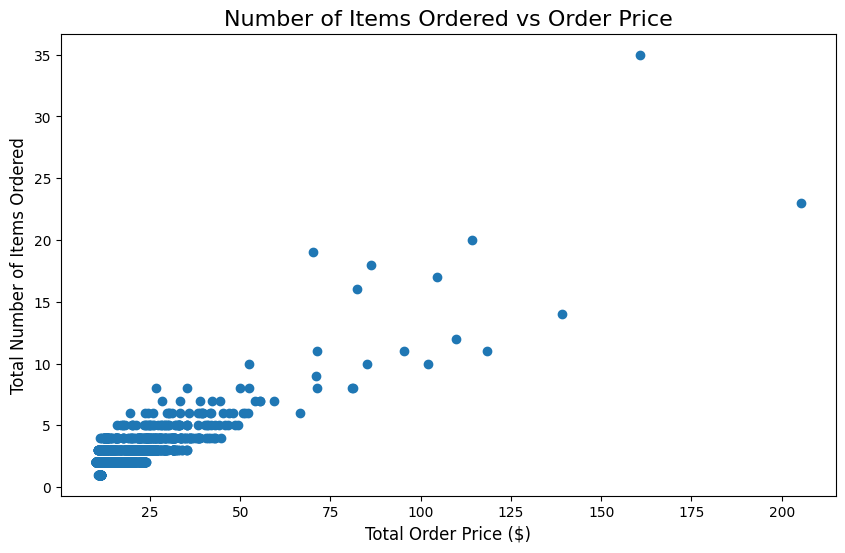

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(scatter.item_price,scatter.quantity)
plt.title('Number of Items Ordered vs Order Price', fontsize=16)
plt.xlabel('Total Order Price ($)', fontsize=12)
plt.ylabel('Total Number of Items Ordered', fontsize=12)
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

<ipython-input-60-c9ec07662481>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x=c['item_name'],y=c['quantity'],palette='Set3')


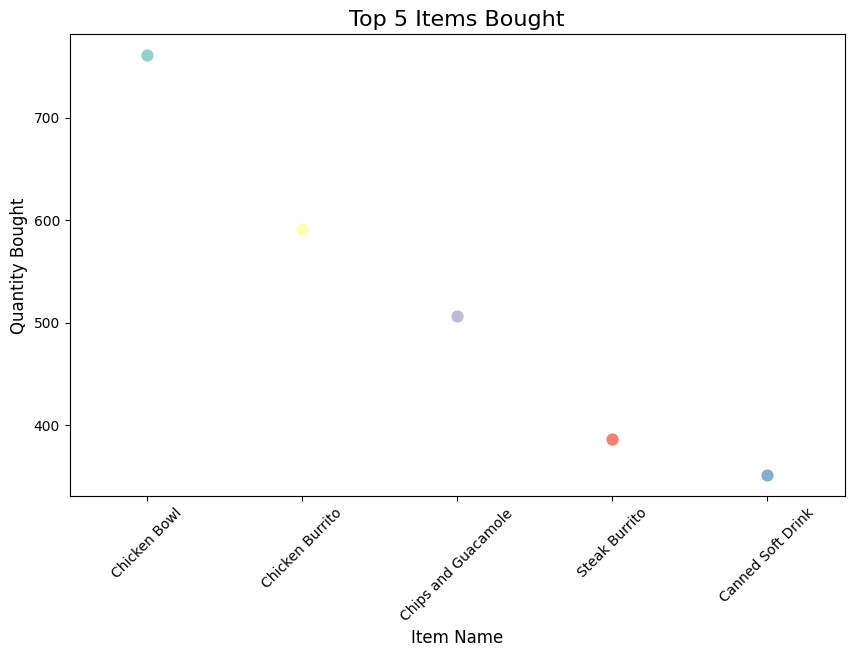

In [60]:
c=chipo.groupby(['item_name'])['quantity'].agg('sum').reset_index().sort_values(by='quantity',ascending=False).head()
c

plt.figure(figsize=(10,6))
sns.pointplot(x=c['item_name'],y=c['quantity'],palette='Set3')

plt.title('Top 5 Items Bought', fontsize=16)
plt.xlabel('Item Name', fontsize=12)
plt.ylabel('Quantity Bought', fontsize=12)
plt.xticks(rotation=45)
plt.show()